# Удержание клиентов в магазине «В один клик»

# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Описание данных

Данные для работы находятся в 4 таблицах.
1. market_file.csv: таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - id — номер покупателя в корпоративной базе данных.
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

2. market_money.csv: таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - Выручка — сумма выручки за период.

3. market_time.csv: таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксировано общее время.
    - минут — значение времени, проведённого на сайте, в минутах.

4. money.csv: таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - id — номер покупателя в корпоративной базе данных.
    - Прибыль — значение прибыли.

# План работы над проектом

1. Загрузка данных: 
- импорт необходимых библиотек
- открытие файлов
- ознакомление с данными с помощью функции explo_data
2. Предобработка данных:
- Приведение названий столбцов к змеиному регистру
- Обработка неявных дубликатов
3. Исследовательский анализ данных:
- Проведение статистического анализа всех признаков
- Определение клиентов с покупательской активностью не менее трёх месяцев
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация пользователей
7. Общий вывод:
- Описание задачи
- Описание исходных данных и проведённой предобработки
- Поиск лучшей модели
- Выводы и дополнительные предложения для выбранного сегмента покупателей

## Загрузка данных

Для начала, импортируем все необходимые пакеты и библиотеки.

In [1]:
# удалим потенциально конфликтующие версии
!pip uninstall -y shap numba numpy matplotlib seaborn

# устанавливаем совместимые версии
!pip install numpy==1.22.4
!pip install matplotlib==3.3.4
!pip install seaborn==0.11.2
!pip install shap==0.41.0
!pip install numba==0.55.1
!pip install -q phik

Found existing installation: shap 0.41.0
Uninstalling shap-0.41.0:
  Successfully uninstalled shap-0.41.0
Found existing installation: numba 0.55.1
Uninstalling numba-0.55.1:
  Successfully uninstalled numba-0.55.1
Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Successfully uninstalled matplotlib-3.3.4
Found existing installation: seaborn 0.11.2
Uninstalling seaborn-0.11.2:
  Successfully uninstalled seaborn-0.11.2
  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyod 0.9.5 requires matplotlib, which is not installed.
pyod 0.9.5 requires numba>=0.35, which is not installed.
phik 0.12.4 requires matplotlib>=2.2.3, which is not inst

In [2]:
# импортируем необходимые библиотеки

import sys
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from scipy.stats import shapiro
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [3]:
# проверка текущего окружения
print("Текущий Python-интерпретатор:", sys.executable)

import sklearn
print("Версия scikit-learn:", sklearn.__version__)

Текущий Python-интерпретатор: /opt/conda/bin/python
Версия scikit-learn: 0.24.1


Считаем 4 CSV-файла с помощью библиотеки pandas и сохраним их в соответствующие датафреймы.

In [4]:
# задаём пути для каждого файла

market_file_path = ['/datasets/market_file.csv', 'data/market_file.csv']
market_money_path = ['/datasets/market_money.csv', 'data/market_money.csv']
market_time_path = ['/datasets/market_time.csv', 'data/market_time.csv']
money_path = ['/datasets/money.csv', 'data/money.csv']

In [5]:
# создаём функцию для безопасной загрузки файла

def safe_read_csv(possible_paths):
    for path in possible_paths:
        if os.path.exists(path):
            with open(path, 'r', encoding='utf-8') as file:
                first_line = file.readline()
            if ';' in first_line:
                sep = ';'
                decimal = ','
            else:
                sep = ','
                decimal = '.'

            print(f"Используется sep='{sep}', decimal='{decimal}' для файла {path}")
            return pd.read_csv(path, sep=sep, decimal=decimal)
    
    print(f"Не удалось найти файл в указанных путях: {possible_paths}")
    return None

In [6]:
# загружаем датасеты с помощью функции safe_read_csv()

market_file = safe_read_csv(market_file_path)
market_money = safe_read_csv(market_money_path)
market_time = safe_read_csv(market_time_path)
money = safe_read_csv(money_path)

Используется sep=',', decimal='.' для файла /datasets/market_file.csv
Используется sep=',', decimal='.' для файла /datasets/market_money.csv
Используется sep=',', decimal='.' для файла /datasets/market_time.csv
Используется sep=';', decimal=',' для файла /datasets/money.csv


In [7]:
# делаем проверку

display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Теперь изучим общую информацию о каждом датафрейме. Создадим функцию, позволяющую произвести быстрое знакомство с данными.

In [8]:
# создаём функцию

def explo_data(df):
    '''
        Функция выводит следующую информацию о датафрейме: первые пять строк, размеры, названия столбцов, информацию о 
        типах данных и количестве ненулевых значений, пропущенные значения, строки с пропущенными значениями, 
        количество явных дубликатов и строки с явными дубликатами, описательную статистику по числовым признакам (метод df.describe())

        Параметр: df (DataFrame): Датафрейм для анализа.

        Пример использования:
            >>> explo_data(df)
    '''
    print("Первые пять строк:")
    display(df.head())
    print('*'*110)
    print("Размеры датафрейма:")
    print(df.shape)
    print('*'*110)
    print("Названия столбцов датафрейма:")
    print(df.columns)
    print('*'*110)
    print("Информация о датафрейме:")
    df.info()
    print('*'*110)
    print("Количество пропущенных значений:")
    print(df.isna().sum())
    print('*'*110)
    print("Строки с пропущенными значениями:")
    display(df[df.isna().any(axis=1)])
    print('*'*110)
    print("Явные дубликаты:")
    print(df.duplicated().sum())
    print('*'*110)
    print("Строки с явными дубликатами:")
    display(df[df.duplicated()])

Ознакомимся последовательно с 4 датафреймами.

In [9]:
# знакомимся с датафреймом "market_file"

explo_data(market_file)

Первые пять строк:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


**************************************************************************************************************
Размеры датафрейма:
(1300, 13)
**************************************************************************************************************
Названия столбцов датафрейма:
Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')
**************************************************************************************************************
Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               -------

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит


**************************************************************************************************************
Явные дубликаты:
0
**************************************************************************************************************
Строки с явными дубликатами:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит


In [10]:
# знакомимся с датафреймом "market_money"

explo_data(market_money)

Первые пять строк:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


**************************************************************************************************************
Размеры датафрейма:
(3900, 3)
**************************************************************************************************************
Названия столбцов датафрейма:
Index(['id', 'Период', 'Выручка'], dtype='object')
**************************************************************************************************************
Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
**************************************************************************************************************
Количество пропущенных значений:
id         0
Период     0
Вы

,id,Период,Выручка


**************************************************************************************************************
Явные дубликаты:
0
**************************************************************************************************************
Строки с явными дубликатами:


,id,Период,Выручка


In [11]:
# знакомимся с датафреймом "market_time"

explo_data(market_time)

Первые пять строк:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


**************************************************************************************************************
Размеры датафрейма:
(2600, 3)
**************************************************************************************************************
Названия столбцов датафрейма:
Index(['id', 'Период', 'минут'], dtype='object')
**************************************************************************************************************
Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
**************************************************************************************************************
Количество пропущенных значений:
id        0
Период    0
минут     0
dtype: int64
***

,id,Период,минут


**************************************************************************************************************
Явные дубликаты:
0
**************************************************************************************************************
Строки с явными дубликатами:


,id,Период,минут


In [12]:
# знакомимся с датафреймом "money"

explo_data(money)

Первые пять строк:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**************************************************************************************************************
Размеры датафрейма:
(1300, 2)
**************************************************************************************************************
Названия столбцов датафрейма:
Index(['id', 'Прибыль'], dtype='object')
**************************************************************************************************************
Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
**************************************************************************************************************
Количество пропущенных значений:
id         0
Прибыль    0
dtype: int64
*************************************************

,id,Прибыль


**************************************************************************************************************
Явные дубликаты:
0
**************************************************************************************************************
Строки с явными дубликатами:


,id,Прибыль


**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

В результате первого ознакомления с данными, было замечено следующее:
    
**датафрейм "market_file":**
- Размер: 1300 строки, 13 столбцов.
- По спецификации названия столбцов можно оставить кириллическими, но всё же следует их привести к змеиному регистру во избежание потенциальных проблем в дальнейшем.
- Типы данных корректны.
- Пропущенных значений нет.
- Явных дубликатов не выявлено.
- Данные в таблице соответствуют описанию.

**датафрейм "market_money":**
- Размер: 3900 строк, 3 столбца.
- Также приведём названия столбцов к змеиному регистру для удобства работы с ними.
- Типы данных корректны.
- Пропущенных значений нет.
- Явных дубликатов не обнаружено.
- Данные в таблице соответствуют описанию.
        
**датафрейм "market_time":**
- Размер: 2600 строк, 3 столбца.
- Также приведём названия столбцов к змеиному регистру для удобства работы с ними.
- Типы данных корректны.
- Пропущенных значений нет.
- Явных дубликатов не обнаружено.
- Данные в таблице соответствуют описанию.
    
**датафрейм "money":**
- Размер: 1300 строк, 2 столбца.
- Также приведём названия столбцов к змеиному регистру для удобства работы с ними.
- В столбце "Прибыль" стоит запятая вместо точки в качестве разделителя в десятичной дроби. Это следует исправить и заменить тип данных на float.
- Пропущенных значений нет.
- Явных дубликатов не обнаружено.
- Данные в таблице соответствуют описанию.
    
С учётом всего вышесказанного, перейдём к предобработке данных.

##  Предобработка данных

Обработаем замечания, выявленные на этапе загрузки и ознакомления данных. Кроме того, сделаем проверку на наличие неявных дубликатов.

### Приведение названий столбцов к змеиному регистру

Для начала приведём названия столбцов всех датафреймов к змеиному регистру.

In [13]:
# создаём список всех датафреймов

dfs = [
    market_file,
    market_money,
    market_time,
    money
    
]

In [14]:
# создаём функцию преобразования в змеиный регистр

def to_snake_case(s):
    s = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', s)
    s = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', s)
    s = s.replace(' ', '_').replace('-', '_')
    return s.lower()

In [15]:
# применяем функцию to_snake_case ко всем датафреймам

for df in dfs:
    df.columns = [to_snake_case(column) for column in df.columns]

In [16]:
# делаем проверку

for df in dfs:
    print(df.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


Названия столбцов всех датафремов приведены к змеиному регистру.

### Обработка неявных дубликатов

Теперь сделаем проверку на неявные дубликаты. Явных ещё на этапе ознакомления с данными обнаружено не было.

In [17]:
# определяем категориальные столбцы в 4 датафреймах для проверки

cat_columns = {
    'market_file': ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория'],
    'market_money': ['период'],
    'market_time': ['период']
}

# делаем проверку на неявные дубликаты

for df_name, columns in cat_columns.items():
    df = eval(df_name)
    print('*'*100)
    print(f"датафрейм: {df_name}\n")
    for col in columns:
        print(f"{col}: {sorted(df[col].unique())}\n")

****************************************************************************************************
датафрейм: market_file

покупательская_активность: ['Прежний уровень', 'Снизилась']

тип_сервиса: ['премиум', 'стандарт', 'стандартт']

разрешить_сообщать: ['да', 'нет']

популярная_категория: ['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']

****************************************************************************************************
датафрейм: market_money

период: ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

****************************************************************************************************
датафрейм: market_time

период: ['предыдцщий_месяц', 'текущий_месяц']



Констатируем две проблемы:
- в датафрейме "market_file" столбец "тип_сервиса" опечатка "стандартт" вместо "стандарт";
- в датафрейме "market_time" в столбце "период" опечатка в "предыдцщий_месяц" вместо "предыдущий_месяц".

Исправим это.

In [18]:
# делаем необходимые преобразования

market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [19]:
# делаем финальную проверку на неявные дубликаты

for df_name, columns in cat_columns.items():
    df = eval(df_name)
    print('*'*100)
    print(f"датафрейм: {df_name}\n")
    for col in columns:
        print(f"{col}: {sorted(df[col].unique())}\n")

****************************************************************************************************
датафрейм: market_file

покупательская_активность: ['Прежний уровень', 'Снизилась']

тип_сервиса: ['премиум', 'стандарт']

разрешить_сообщать: ['да', 'нет']

популярная_категория: ['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']

****************************************************************************************************
датафрейм: market_money

период: ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

****************************************************************************************************
датафрейм: market_time

период: ['предыдущий_месяц', 'текущий_месяц']



Неявные дубликаты обработаны успешно.

**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

В этой главе мы выполнили следующие действия:
    
- Привели названия столбцов к змеиному регистру во всех 4 датафреймах.
- Преобразовали тип данных в столбце "прибыль" датафрейма "money".
- Обработали неявные дубликаты в датафреймах "market_file" и "market_time".
    
Теперь можно переходить к исследовательскому анализу данных.

## Исследовательский анализ данных

### Проведение статистического анализа всех признаков

Проведём статистический анализ последовательно для каждого датафрейма по принципу: сначала проанализируем количественные признаки, затем категориальные и по каждому из типов сделаем выводы.

Начнём с количественных признаков датафрейма "market_file".

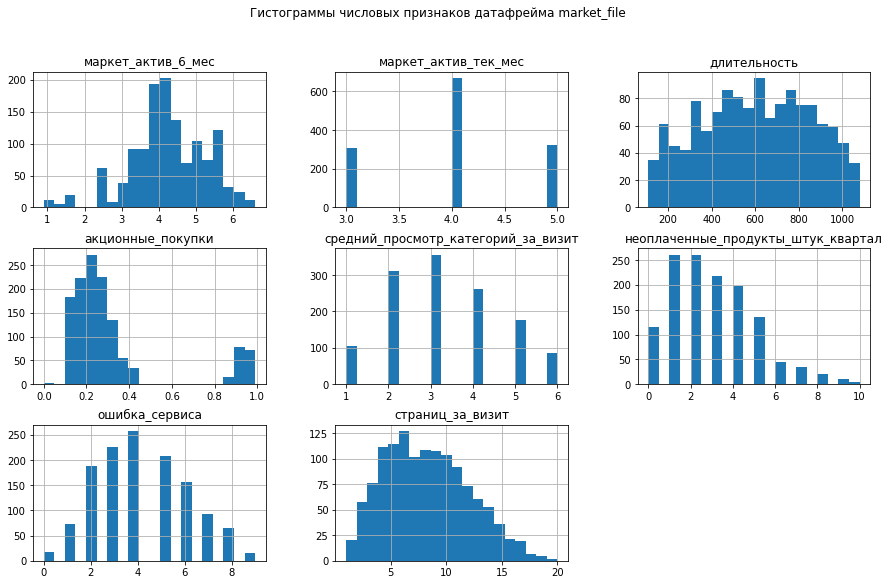

************************************************************************************************************************


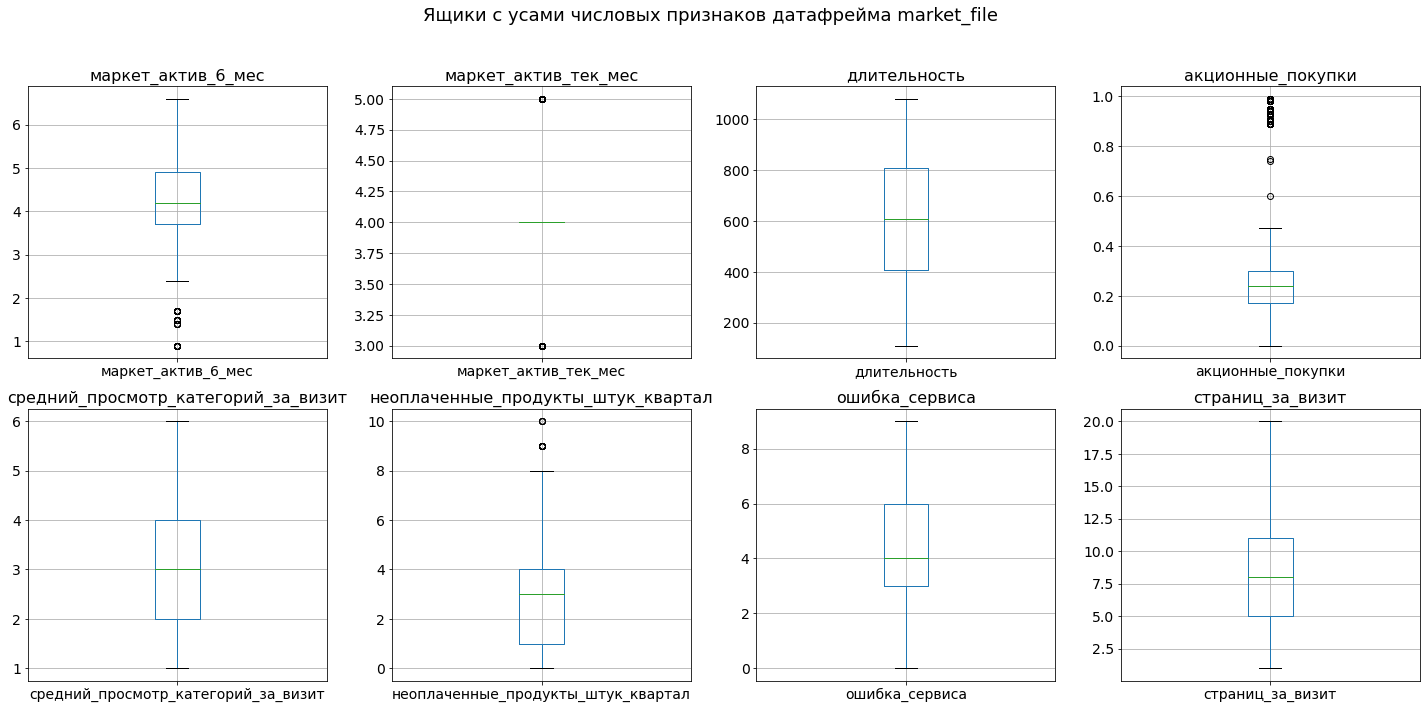

************************************************************************************************************************
Описательные статистики:
       маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count         1300.000000           1300.000000   1300.000000   
mean             4.253769              4.011538    601.898462   
std              1.014814              0.696868    249.856289   
min              0.900000              3.000000    110.000000   
25%              3.700000              4.000000    405.500000   
50%              4.200000              4.000000    606.000000   
75%              4.900000              4.000000    806.000000   
max              6.600000              5.000000   1079.000000   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min     

In [20]:
# создаём список количественных столбцов
cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
        'акционные_покупки', 'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
        'страниц_за_визит']

# для каждого из столбцов датафрейма
existing_cols = [col for col in cols if col in market_file.columns]

# строим гистограмму
market_file[existing_cols].hist(bins=20, figsize=(15, 9))
plt.suptitle('Гистограммы числовых признаков датафрейма market_file')
plt.show()
print('*' * 120)

# ящик с усами
n_cols = 4
n_rows = (len(existing_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(existing_cols):
    market_file[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].grid(True)

# удаляем пустые оси
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Добавляем заголовок только к секции ящиков с усами
fig.suptitle('Ящики с усами числовых признаков датафрейма market_file', fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # оставляем сверху место для заголовка секции
plt.show()
print('*' * 120)

# а также выводим описательные статистики для полноты картины
print("Описательные статистики:")
print(market_file[existing_cols].describe())

In [21]:
market_file['маркет_актив_тек_мес'].value_counts()

4    669
5    323
3    308
Name: маркет_актив_тек_мес, dtype: int64

**Маркетинговая активность за 6 месяцев (маркет_актив_6_мес)**:

- Среднее значение составляет 4.25, медиана — 4.2.
- Распределение гистограммы приближено к нормальному, однако наблюдаются выбросы среди клиентов, получающих крайне низкий объём коммуникаций (около 1). Это может свидетельствовать о сегменте клиентов, по которым компания не ведёт активного маркетинга или которые игнорируют взаимодействие.
- На ящике усов также наблюдаются выбросы в нижней части (около 1).

**Маркетинговая активность в текущем месяце (маркет_актив_тек_мес)**:

- 669 клиентов в среднем получили 4 коммуникации. 308 - 3 коммуникации и 323 - 5. Значения дискретные и их всего 3.

**Длительность (длительность)**:

- Средняя длительность — 602 дней, медиана 606 дней.
- Диапазон достаточно широкий: от 110 до 1079 дней.

**Акционные покупки (акционные_покупки)**:

- Среднее значение — 0.32 (32% покупок по акции), медиана — 0.24.
- Распределение скошено влево: большинство клиентов совершают менее 30% покупок по акции, но при этом существует сегмент клиентов, ориентированных почти исключительно на акции (до 99%), что формирует экстремальные выбросы. Это указывает на существование чувствительных к акциям клиентов, которые могут реагировать преимущественно на скидки.


**Средний просмотр категорий за визит (средний_просмотр_категорий_за_визит)**:

- Среднее значение — 3.27 категорий, медиана 3.
- Распределение приближено к нормальному, большинство клиентов просматривают от 2 до 4 категорий за визит. Присутствуют пользователи, изучающие до 6 категорий.

**Неоплаченные товары за последний квартал (неоплаченные_продукты_штук_квартал)**:

- Среднее количество — 2.84 товара, медиана — 3.
- Значительная доля клиентов имеет от 1 до 4 неоплаченных товаров, но есть выбросы до 10 товаров, указывающие на потенциальные потери выручки.

**Ошибка сервиса (ошибка_сервиса)**:

- Среднее значение 4.19, медиана 4.
- Большинство клиентов сталкивались с 3-6 ошибками, присутствуют случаи с 9 ошибками, что формирует выбросы. Это может негативно сказываться на лояльности и пользовательском опыте.

**Страниц за визит (страниц_за_визит)**:

- Среднее количество просмотренных страниц за визит — 8.18, медиана — 8.
- Диапазон от 1 до 20, большинство пользователей просматривают от 5 до 11 страниц, но есть клиенты, просматривающие до 20 страниц. Это может говорить о высоко вовлечённых пользователях.

Теперь рассмотрим категориальные признаки датафрейма "market_file".


Столбец: покупательская_активность
Уникальные значения: 2
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64


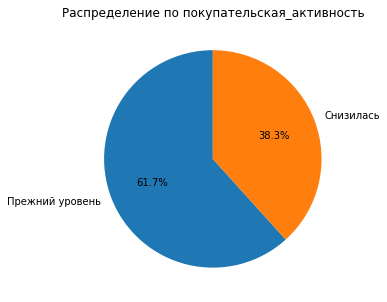


Столбец: тип_сервиса
Уникальные значения: 2
стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


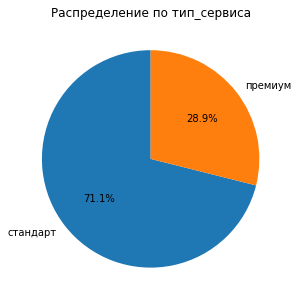


Столбец: разрешить_сообщать
Уникальные значения: 2
да     962
нет    338
Name: разрешить_сообщать, dtype: int64


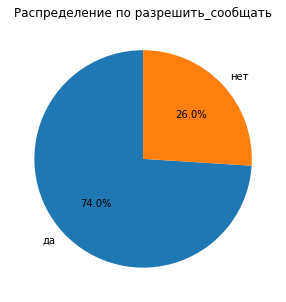


Столбец: популярная_категория
Уникальные значения: 6
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


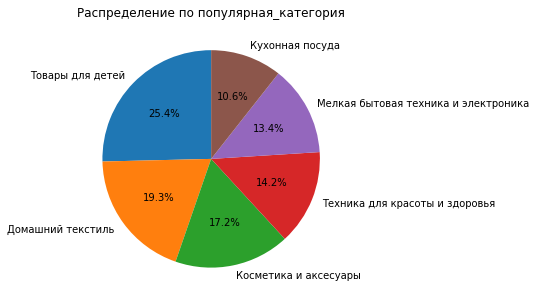

In [22]:
# создаём список категориальных столбцов
cat_cols = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

# для каждого из столбцов датафрейма
for col in cat_cols:
    if col in market_file.columns:
        # считаем уникальные значения
        counts = market_file[col].value_counts()
        print(f"\nСтолбец: {col}")
        print(f"Уникальные значения: {market_file[col].nunique()}")
        print(counts)
        
        # и строим круговую диаграмму
        plt.figure(figsize=(5, 5))
        counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Распределение по {col}')
        plt.ylabel('')
        plt.show()
    else:
        print(f"\nСтолбец {col} отсутствует в market_file")

**Покупательская активность (покупательская_активность)**:

- Всего 2 уникальных значения: "Прежний уровень" и "Снизилась".
- 61.7% клиентов сохранили прежний уровень активности.
- 38.3% клиентов снизили свою активность.

Показатель достаточно тревожный: почти 4 из 10 клиентов снизили активность, что может требовать дополнительных мер по удержанию.

**Тип сервиса (тип_сервиса)**:

- 2 уникальных значения: "стандарт" и "премиум".
- 71.1% клиентов пользуются стандартным сервисом.
- 28.9% клиентов выбрали премиум.

Доля премиум-пользователей составляет менее трети, что оставляет потенциал для увеличения продаж через апсейл стандартных пользователей.

**Разрешить сообщать (разрешить_сообщать)**:

- 2 уникальных значения: да и нет.
- 74% клиентов разрешили получать сообщения.
- 26% клиентов отказались.

Уровень согласия высокий, что открывает хорошие возможности для коммуникации и маркетинга через сообщения.

**Популярная категория (популярная_категория)**:

Есть 6 уникальных категорий товаров:
- Товары для детей — 25.4% (самая популярная категория).
- Домашний текстиль — 19.3%.
- Косметика и аксессуары — 17.2%.
- Техника для красоты и здоровья — 14.2%.
- Мелкая бытовая техника и электроника — 13.4%.
- Кухонная посуда — 10.6% (наименее популярная).

Ассортимент ориентирован в первую очередь на детские товары и текстиль, но при этом кухонная посуда и электроника показывают наименьший интерес у клиентов.

Перейдём к количественным и категориальным столбцам датафрейма "market_money".

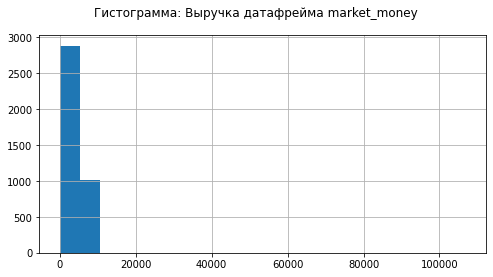

In [23]:
# строим гистограмму
market_money['выручка'].hist(bins=20, figsize=(8, 4))
plt.suptitle('Гистограмма: Выручка датафрейма market_money');

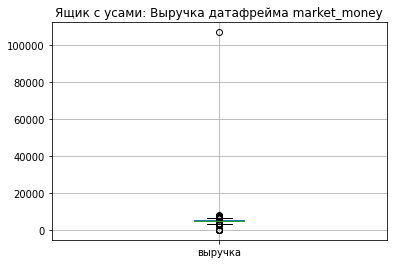

In [24]:
# ящик с усами
market_money[['выручка']].boxplot()
plt.title('Ящик с усами: Выручка датафрейма market_money', fontsize=12);

In [25]:
# а также выводим описательные статистики для полноты картины
print("Описательные статистики:")
print(market_money['выручка'].describe())

Описательные статистики:
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


- Средняя выручка составляет 5025.7, медиана — 4957.5, что указывает на слабо выраженное влияние высоких значений на среднее.
- Распределение сильно скошено вправо, о чём говорит большая разница между максимумом (106 862.2) и 75-м перцентилем (5363).
- Основная масса данных сосредоточена в диапазоне до 5363, а редкие крупные значения формируют значительное количество выбросов, сильно отдалённых от остальной выборки.
- Выбросы представлены экстремально высокими значениями, которые существенно искажают восприятие данных при построении ящика с усами.
- Нулевая выручка также присутствует.

In [26]:
# найдём id с максимальной выручкой
outlier_id = market_money.loc[market_money['выручка'].idxmax(), 'id']
outlier_id

215380

In [27]:
# найдём строку с этим id
market_money[market_money['id'] == 215380]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Таких оказалось три за каждый период соответственно. Нам нужно удалить только аномальное значение, равное 106 862.2. Для этого нужно учесть id равный 215380 и текущий месяц в качестве периода.

In [28]:
# удалим строку, где id = 215380 и период = 'текущий_месяц'
market_money = market_money[
    ~((market_money['id'] == 215380) & (market_money['период'] == 'текущий_месяц'))
]

In [29]:
# делаем проверку
market_money[market_money['id'] == 215380]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0


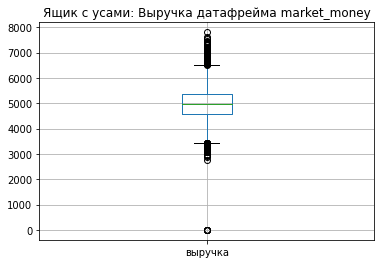

In [30]:
# ящик с усами
market_money[['выручка']].boxplot()
plt.title('Ящик с усами: Выручка датафрейма market_money', fontsize=12);

In [31]:
# считаем уникальные значения для столбца "Период"

counts = market_money['период'].value_counts()
print(f"\nСтолбец: Период")
print(f"Уникальные значения: {market_money['период'].nunique()}")
print(counts)


Столбец: Период
Уникальные значения: 3
предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1299
Name: период, dtype: int64


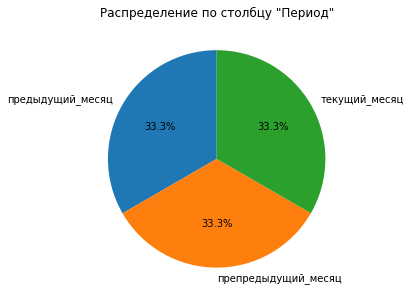

In [32]:
# и строим круговую диаграмму

plt.figure(figsize=(5, 5))
counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Распределение по столбцу "Период"')
plt.ylabel('');

- В столбце присутствует 3 уникальных значения: "текущий месяц", "предыдущий месяц" и "препредыдущий месяц".
- Распределение по трём периодам полностью равномерное — каждая группа содержит 1300 записей, что составляет ровно 33.3% от общего числа записей.
- Данные сбалансированы по периодам, что позволяет проводить корректное сравнение между месяцами без необходимости дополнительной балансировки выборки.

Проанализируем количественный и категориальный столбцы датафрейма "market_time".

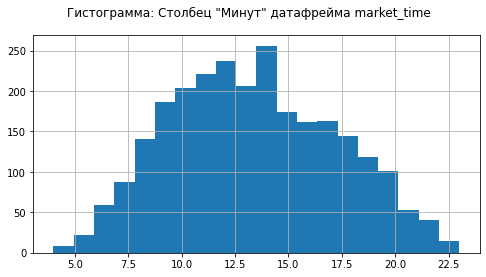

In [33]:
# строим гистограмму
market_time['минут'].hist(bins=20, figsize=(8, 4))
plt.suptitle('Гистограмма: Столбец "Минут" датафрейма market_time');

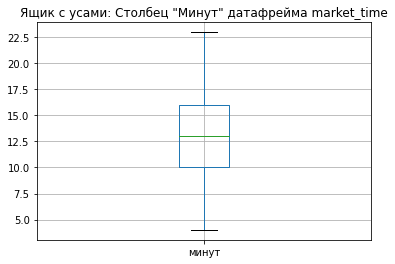

In [34]:
# ящик с усами
market_time[['минут']].boxplot()
plt.title('Ящик с усами: Столбец "Минут" датафрейма market_time', fontsize=12);

In [35]:
# а также выводим описательные статистики для полноты картины
print("Описательные статистики:")
print(market_time['минут'].describe())

Описательные статистики:
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


- Среднее время посещения сайта: 13.34 минуты.
- Медианное время: 13 минут.
- Диапазон значений: от 4 до 23 минут.
- 50% клиентов проводят на сайте от 10 до 15 минут.
- Распределение близко к нормальному, с лёгким смещением вправо. Большинство пользователей проводят на сайте от 10 до 15 минут, что можно считать стандартным временем визита.
- Наблюдаются клиенты, проводящие на сайте более 20 минут — это может быть как высоко вовлечённая аудитория, так и пользователи, испытывающие трудности с поиском нужного товара.
- Также присутствует небольшая доля клиентов, у которых визит ограничивается минимальным значением 4 минуты, что может указывать на быструю проверку или неудовлетворённость опытом.

In [36]:
# считаем уникальные значения для столбца "Период"

counts = market_time['период'].value_counts()
print(f"\nСтолбец: Период")
print(f"Уникальные значения: {market_time['период'].nunique()}")
print(counts)


Столбец: Период
Уникальные значения: 2
предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64


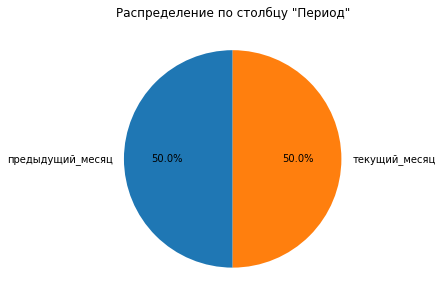

In [37]:
# и строим круговую диаграмму

plt.figure(figsize=(5, 5))
counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Распределение по столбцу "Период"')
plt.ylabel('');

- В столбце присутствует 2 уникальных значения: "текущий месяц" и "предыдущий месяц".
- Распределение по двум периодам абсолютно равномерное — каждая группа содержит 1300 записей, что составляет ровно 50% от общего числа записей.
- Данные сбалансированы по периодам. Это позволяет проводить объективное сравнение между текущим и предыдущим месяцами без риска искажения выводов из-за несбалансированной выборки.

Разберём ещё один числовой столбец датафрейма "money".

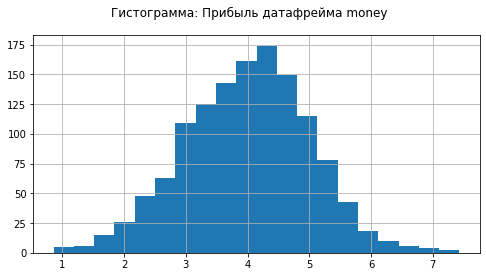

In [38]:
# строим гистограмму
money['прибыль'].hist(bins=20, figsize=(8, 4))
plt.suptitle('Гистограмма: Прибыль датафрейма money');

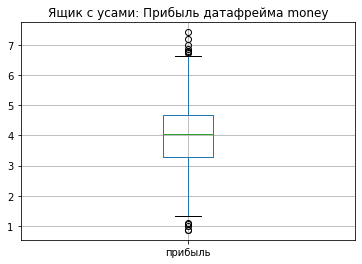

In [39]:
# ящик с усами
money[['прибыль']].boxplot()
plt.title('Ящик с усами: Прибыль датафрейма money', fontsize=12);

In [40]:
# а также выводим описательные статистики для полноты картины
print("Описательные статистики:")
print(money['прибыль'].describe())

Описательные статистики:
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


- Средняя прибыль: 3.997.
- Медианная прибыль: 4.045.
- Диапазон: от 0.86 до 7.43.
- Межквартильный диапазон составляет от 3.3 до 4.67.
- Распределение приближено к нормальному, что подтверждается практически совпадающими средним и медианным значениями.
- Наблюдаются выбросы как в нижней части (прибыль менее 1), так и в верхней (прибыль выше 7), что соответствует клиентам с высокой прибылью. Это может быть потенциально интересным сегментом для VIP-подхода или персональных предложений.

### Определение клиентов с покупательской активностью не менее трёх месяцев

Для определения клиентов с покупательской активностью не менее трёх месяцев будем работать с датафреймом "market_money", где содержится необходимая для этого информация. В столбце "период" содержатся три уникальных значения: "текущий месяц", "предыдущий месяц", то есть это фактически период за последние три месяца.

In [41]:
market_money['период'].value_counts()

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1299
Name: период, dtype: int64

Если значение в столбце "выручка" больше нуля, значит можно говорить о покупательской активности соответствующего клиента.

In [42]:
# отбираем только строки с выручкой больше нуля

active_df = market_money[market_money['выручка'] > 0]

In [43]:
# проверяем, что у нас 3 месяца в отфильтрованном датафрейме active_df

print(active_df['период'].unique())

['текущий_месяц' 'препредыдущий_месяц' 'предыдущий_месяц']


In [44]:
# группируем по клиентам и считаем, в скольких периодах клиент был с выручкой больше 0
active_clients = (active_df.groupby('id')['период']
                  .nunique()
                  .reset_index()
                  .rename(columns={'период': 'активные_месяцы'}))

# оставляем только тех, у кого активность есть во всех 3 месяцах
active_clients_3months = active_clients[active_clients['активные_месяцы'] == 3]
print(f"Количество клиентов с активностью все 3 месяца: {active_clients_3months.shape[0]}")

Количество клиентов с активностью все 3 месяца: 1296


In [45]:
# получаем датафрейм по этим клиентам

final_active_df = market_money[market_money['id'].isin(active_clients_3months['id'])]
display(final_active_df.head())

,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

В этой главе мы провели исследовательский анализ данных всех 4 датафреймов. На основе этого анализа можно сделать следующие выводы:
    
**Маркетинговая активность**:
- Активность за 6 месяцев показывает стабильное среднее значение (4.25), но при этом есть сегмент клиентов с крайне низкой активностью (около 1), что может свидетельствовать о низком охвате или игнорировании маркетинговых коммуникаций.
- Текущая маркетинговая активность демонстрирует стандартизированный подход с 3, 4 или 5 коммуникациями, где большинство клиентов получают 4 коммуникации.
    
**Это говорит о структурированной маркетинговой политике, с возможностью оптимизации под разные сегменты клиентов.**

**Поведение клиентов на сайте**:
- Среднее время визита составляет 13.3 минуты, медиана 13 минут.
- Большинство клиентов проводят на сайте 10–15 минут, однако присутствуют как короткие визиты (4 минуты), так и сверхдлинные (более 20 минут), что требует дополнительного изучения причин.
- Просмотр категорий за визит остаётся на уровне 3.27 категорий, с большей частью клиентов, просматривающих 2–4 категории, но также есть сегмент более любознательных пользователей (до 6 категорий).

**Просмотр страниц за визит также подтверждает стабильную вовлечённость (8.18 страниц в среднем), но при этом выделяется узкая группа клиентов, просматривающих до 20 страниц, что указывает либо на повышенный интерес, либо на сложности в навигации.**

**Покупательская и финансовая активность**:
- Покупательская активность снизилась у 38.3% клиентов, что является тревожным индикатором и требует активации программ удержания.
- Средняя прибыль клиента остаётся стабильной (3.997, медиана 4.045), с нормальным распределением. Однако заметны клиенты с прибылью ниже 1, а также выделяется сегмент VIP-клиентов с прибылью выше 7, которые могут стать фокусом для персональных программ лояльности.
- Средняя выручка демонстрирует сильное смещение вправо — основная масса клиентов приносит до 5363 единиц, а редкие крупные клиенты формируют выбросы (до 106862.2), что требует дополнительного анализа.

**Реакция на акции и поведение в корзине**:
- Доля покупок по акции у клиентов остаётся 32%, с наличием особого сегмента, совершающего почти все покупки по акциям (до 99%), что подтверждает важность точечного управления акциями.
- Количество неоплаченных товаров в корзине остаётся на уровне 2.84, однако есть клиенты с 10 неоплаченными товарами, что сигнализирует о потере потенциальной выручки и необходимости дополнительных действий, которые могут смотивировать пользователя для совершения покупки.

**Ошибки сервиса**:
- Среднее число ошибок сервиса — 4.19.
- Большинство клиентов сталкивались с 3–6 ошибками, однако есть клиенты и с 9 ошибками, что требует срочных технических доработок и контроля качества.

**Категории интереса**:
- Самые популярные категории — товары для детей (25.4%) и домашний текстиль (19.3%).
- Наименее популярные — кухонная посуда (10.6%) и электроника (13.4%).
    
**Это показывает преобладание интереса к семейным категориям.**

**Коммуникационные предпочтения**:
- 74% клиентов разрешили получать сообщения, что предоставляет компании широкие возможности для маркетинга.

**Периоды анализа**:
- Данные по выручке и активности равномерно распределены по 3 месяцам, что позволяет проводить надёжные сравнения между периодами.
- В случае датафрейма "market_time" выборка также идеально сбалансирована по 2 месяцам, что также создаёт устойчивую базу для динамического анализа.

## Объединение таблиц

Теперь наша задача - объединить три датафрейма: "market_file", "market_money" и "market_time". Но прежде чем это сделать, нужно учесть, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице необходимо создать отдельный столбец для каждого периода.

Выполним следующую последовательность действий:
- сначала преобразуем датафрейм "market_money" так, чтобы по каждой строке был отдельный столбец: выручка_текущий_месяц, выручка_предыдущий_месяц, выручка_препредыдущий_месяц;
- затем тоже самое проделаем для датафрейма "market_time";
- и наконец объединим все таблицы по столбцу "id".

In [46]:
# делаем pivot таблицы market_money

pivot_money = market_money.pivot(index='id', columns='период', values='выручка')
pivot_money = pivot_money.rename(columns={
    'текущий_месяц': 'выручка_текущий_месяц',
    'предыдущий_месяц': 'выручка_предыдущий_месяц',
    'препредыдущий_месяц': 'выручка_препредыдущий_месяц'
}).reset_index()

# и делаем проверку
pivot_money.head()

период,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


У нас появились три столбца, соответствующие выручке за каждый из трёх месяцев. Поступаем по аналогии с датафреймом "market_time".

In [47]:
# делаем pivot таблицы market_time
pivot_time = market_time.pivot(index='id', columns='период', values='минут')
pivot_time = pivot_time.rename(columns={
    'текущий_месяц': 'минут_текущий_месяц',
    'предыдущий_месяц': 'минут_предыдущий_месяц'
}).reset_index()

# и делаем проверку
pivot_time.head()

период,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


Получили два столбца со временем, которое проводят пользователи на сайте, для текущего и предыдущего месяцев. Теперь можно заняться объединением таблиц.

In [48]:
# объединяем все 3 таблицы по id

final_data = market_file.merge(pivot_money, on='id', how='left')
final_data = final_data.merge(pivot_time, on='id', how='left')

In [49]:
# проверяем результат

display(final_data.head())
print(f"Финальная таблица: {final_data.shape[0]} строк, {final_data.shape[1]} столбцов")

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


Финальная таблица: 1300 строк, 18 столбцов


In [50]:
# ограничиваем только активными клиентами

final_data = final_data[final_data['id'].isin(active_clients_3months['id'])]
print(f"Финальная таблица: {final_data.shape[0]} строк, {final_data.shape[1]} столбцов")

Финальная таблица: 1296 строк, 18 столбцов


Теперь у нас есть финальная таблица со всеми необходимыми столбцами. И можно переходить к коррелиционному анализу признаков этой таблицы.

**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

В этой главе мы объединили три датафрейма: "market_file", "market_money" и "market_time" для последующего корреляционного анализа и моделирования.

## Корреляционный анализ

Проведём корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования и сделаем выводы о мультиколлинеарности и при необходимости устраним её.

In [51]:
# за ненадобностью удаляем столбец "id" из финального датафрейма и делаем проверку

data_for_corr = final_data.drop(columns=['id'])
data_for_corr.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [52]:
# собираем список всех числовых признаков типов int и float, 
# чтобы указать их как интервальные переменные в анализе phik
# и делаем проверку

numeric_cols = data_for_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_предыдущий_месяц',
 'выручка_препредыдущий_месяц',
 'выручка_текущий_месяц',
 'минут_предыдущий_месяц',
 'минут_текущий_месяц']

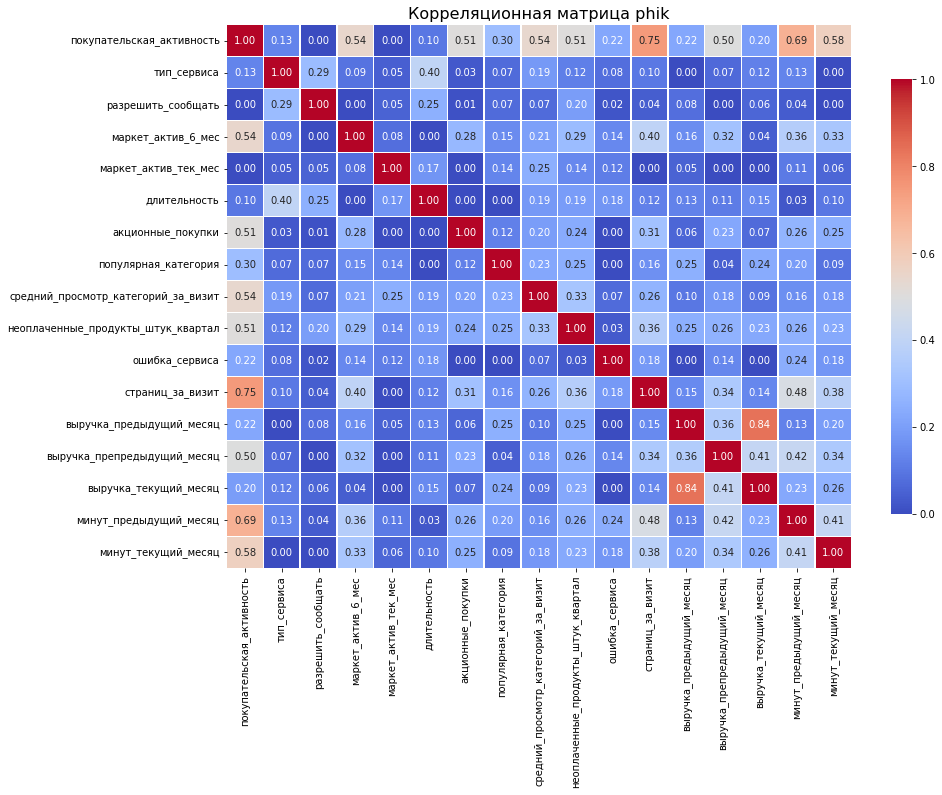

In [53]:
# строим матрицу корреляции phik, которая работает и с числовыми, и с категориальными признаками
phik_matrix = data_for_corr.phik_matrix(interval_cols=numeric_cols)

# визуализируем корреляционную матрицу phik как тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица phik', fontsize=16);

In [54]:
# исследуем пары с достаточно высокой и высокой корреляцией, которая превышает 0.6
high_corr = phik_matrix.abs().unstack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'correlation']
high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']]
high_corr = high_corr[high_corr['correlation'] > 0.6].drop_duplicates(subset=['correlation'])
high_corr = high_corr.sort_values(by='correlation', ascending=False)

# выводим пары с высокой корреляцией
high_corr

,feature_1,feature_2,correlation
218,выручка_предыдущий_месяц,выручка_текущий_месяц,0.836281
11,покупательская_активность,страниц_за_визит,0.749888
15,покупательская_активность,минут_предыдущий_месяц,0.685138


У нас получилась пара: выручка_предыдущий_месяц и выручка_текущий_месяц с очень высокой корреляцией. Это означает, что выручка за текущий и предыдущий месяц очень похожи по поведению у большинства клиентов. Такая высокая корреляция может свидетельствовать о мультиколлинеарности, которая может повлиять на модель LogisticRegression, которую мы будем использовать в дальнейшем. Поэтому следует удалить один из признаков, чтобы избежать мультиколлинеарности. Лучше оставить, например, только выручка_текущий_месяц, как более свежий и актуальный показатель.

Также наблюдается сильная зависимость между количеством просмотренных страниц и покупательской активностью (0.75), а также между временем на сайте в предыдущий месяц и сохранением активности (0.68). Обе переменные — страниц_за_визит и минут_предыдущий_месяц — являются информативными признаками для предсказания активности и их следует включить в модель.

Прежде чем принимать решение об удалении выручки за предыдущий месяц или выручки за текущий месяц, сделаем дополнительную проверку на мультиколлинеарность между ними с помощью корреляции Спирмана и диаграммы рассеяния.

Корреляция:
                          выручка_предыдущий_месяц  выручка_текущий_месяц
выручка_предыдущий_месяц                  1.000000               0.879097
выручка_текущий_месяц                     0.879097               1.000000


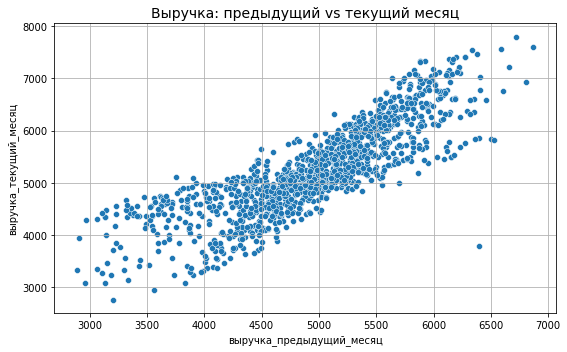

In [55]:
# корреляция Спирмана для пары: выручка_предыдущий_месяц - выручка_текущий_месяц
corr = final_data[['выручка_предыдущий_месяц', 'выручка_текущий_месяц']].corr(method='spearman')
print("Корреляция:")
print(corr)

# диаграмма рассеяния для пары: выручка_предыдущий_месяц - выручка_текущий_месяц
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=final_data,
    x='выручка_предыдущий_месяц',
    y='выручка_текущий_месяц'
)
plt.title('Выручка: предыдущий vs текущий месяц', fontsize=14)
plt.grid(True)
plt.tight_layout();

Да, зависимость между ними очень сильная. Как я предлагала выше, оставим только признак выручка_текущий_месяц, как более свежий и актуальный показатель.

In [56]:
# оставляем только выручку за текущий месяц
final_data = final_data.drop(columns=['выручка_предыдущий_месяц'])

In [57]:
# делаем проверку
print(f"Финальная таблица: {final_data.shape[0]} строк, {final_data.shape[1]} столбцов")

Финальная таблица: 1296 строк, 17 столбцов


Столбец 'выручка_предыдущий_месяц' удалён успешно.

**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

После проведённого корреляционного анализа, мы устранили проблему мультиколлинеарности между признаками выручка_предыдущий_месяц и выручка_текущий_месяц, а также определили, что наиболее сильную связь с покупательской активностью показывают следующие признаки:
- страниц_за_визит (0.75)
- минут_предыдущий_месяц (0.68)
- минут_текущий_месяц (0.58)
- маркет_актив_6_мес, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал — около 0.5–0.55
    
**Эти признаки могут быть важными входящими признаками для модели**.

## Использование пайплайнов

In [58]:
# напомним содержание датафрейма "final_data"

final_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10


In [59]:
# сохраняем id перед удалением

ids = final_data['id']

In [60]:
# преобразуем целевой признак в числа через LabelEncoder

le = LabelEncoder()
final_data['покупательская_активность_num'] = le.fit_transform(final_data['покупательская_активность'])

In [61]:
# делаем проверку

final_data['покупательская_активность_num'].unique()

array([1, 0])

In [62]:
# разделяем признаки на входные и целевой

X = final_data.drop(columns=['id', 'покупательская_активность', 'покупательская_активность_num'])
y = final_data['покупательская_активность_num']

In [63]:
# делим на обучающую и тестовую выборки

RANDOM_STATE = 42
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [64]:
# определяем категориальные и числовые признаки

cat_features_ohe = ['разрешить_сообщать', 'популярная_категория']
cat_features_ord = ['тип_сервиса']
num_features = X.select_dtypes(include=['int64', 'float64']).columns

In [65]:
# создаём пайплайны для обработки категориальных и числовых признаков
# пайплайн для категориальных признаков - OneHotEncoder

cat_ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# пайплайн для категориальных признаков - OrdinalEncoder

cat_ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# пайплайн для числовых признаков с масштабированием с помощью StandardScaler() и MinMaxScaler()

num_std_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

num_minmax_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [66]:
# создаём ColumnTransformer с вариантами для RandomizedSearch

preprocessor = ColumnTransformer([
    ('cat_ohe', cat_ohe_pipeline, cat_features_ohe),
    ('cat_ord', cat_ord_pipeline, cat_features_ord),
    ('num', MinMaxScaler(), num_features)
])

In [67]:
# создаём финальный пайплайн

pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [68]:
# настраиваем параметры для RandomizedSearchCV

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [69]:
# запускаем поиск RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat_ohe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),


В данном проекте стоит цель: предсказать снижение покупательской активности клиента. Это задача бинарной классификации с дисбалансом классов (клиентов со снижением активности меньше, чем с прежним уровнем), а значит:

- Метрики вроде accuracy могут быть неточными в нашем случае — модель может просто предсказывать "прежний уровень" и получать высокую точность.
- Метрика ROC-AUC учитывает ранжирование вероятностей, а не просто метки, и показывает, насколько хорошо модель отличает один класс от другого. Эта метрика устойчива к дисбалансу классов, в отличие от accuracy/precision/recall, и позволяет оценить качество предсказаний по всем возможным порогам вероятности. Поэтому метрика ROC-AUC была выбрана как основная, так как она лучше отражает способность модели разделять классы и позволяет корректно сравнивать модели на кросс-валидации.

In [70]:
# получаем лучшую модель и её параметры

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика ROC-AUC на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
      

In [71]:
# делаем прогноз по всей модели, включая препроцессинг
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]

# выводим метрику на тестовой выборке
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba):.3f}')

Метрика ROC-AUC на тестовой выборке: 0.908


**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

По итогам подбора и оценки моделей наилучший результат показал метод опорных векторов SVC с параметром C=10.

Оценка качества модели:
- Метрика ROC-AUC при кросс-валидации показала 0.901
- ROC-AUC на тестовой выборке показала 0.908
    
Значение ROC-AUC 0.908 говорит о высокой способности модели различать клиентов с прежним уровнем активности и снизившейся активностью.

Небольшое отличие метрики ROC-AUC на тестовой выборке по сравнению с кросс-валидацией говорит о хорошем обобщении модели и отсутствии переобучения.

Модель можно рекомендовать для использования в задачах предсказания снижения покупательской активности, что позволяет вовремя запускать необходимые коммуникации для удержания клиентов.

## Анализ важности признаков

Оценим важность признаков для лучшей модели с помощью анализа важности признаков (Permutation Importance), а затем построим графики важности с помощью метода SHAP.

In [72]:
# достаём обученную модель и препроцессор из пайплайна
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

# трансформируем тестовую выборку
X_test_transformed = preprocessor.transform(X_test)

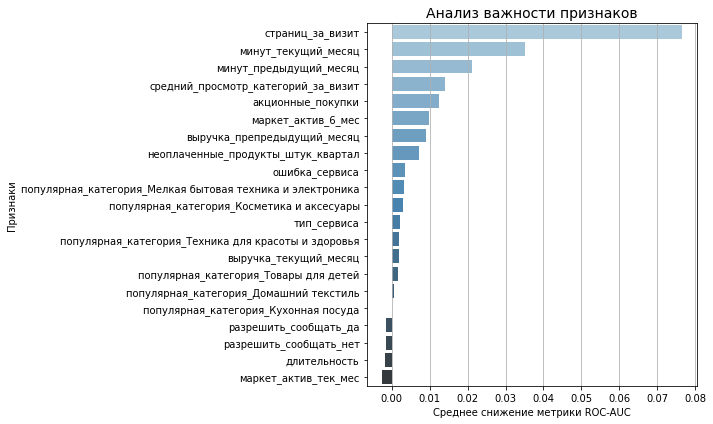

In [73]:
# получаем имена признаков
ohe_feature_names = preprocessor.named_transformers_['cat_ohe']\
    .named_steps['encoder']\
    .get_feature_names(cat_features_ohe)

# объединяем все имена признаков в порядке, в котором они подаются в ColumnTransformer
feature_names = np.concatenate([
    ohe_feature_names,
    cat_features_ord,
    num_features
])

# проводим анализ важности признаков с помощью Permutation Importance
result = permutation_importance(
    best_model, 
    X_test_transformed, 
    y_test, 
    scoring='roc_auc', 
    n_repeats=10, 
    random_state=RANDOM_STATE
)

# формируем таблицу с результатами
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# визуализируем важность признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='importance_mean', y='feature', palette='Blues_d')
plt.title('Анализ важности признаков', fontsize=14)
plt.xlabel('Среднее снижение метрики ROC-AUC')
plt.ylabel('Признаки')
plt.grid(True, axis='x')
plt.tight_layout();

Анализ важности признаков показывает, что снижение покупательской активности сильнее всего связано с падением вовлечённости, клиенты меньше просматривают страниц и меньше времени проводят на сайте. Выручка и акционные покупки также важны, но вторичны.

Permutation explainer: 973it [11:45,  1.37it/s]                         


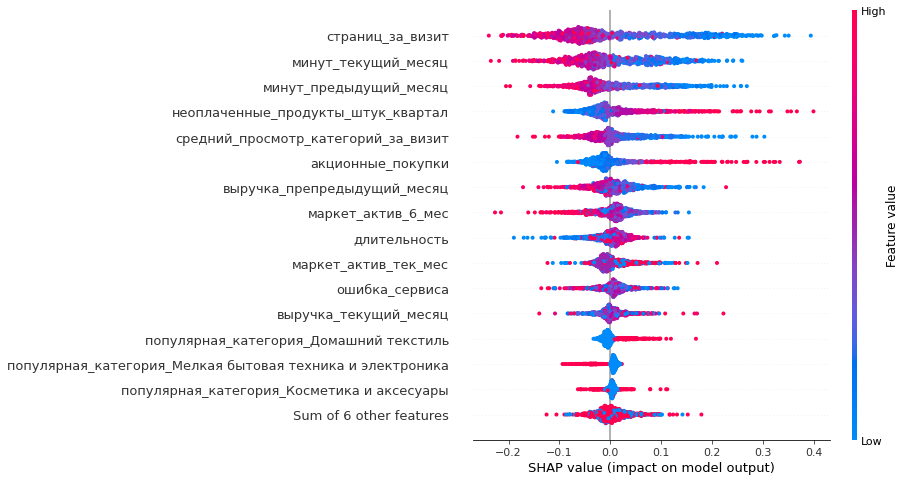

In [74]:
# строим график beeswarm с помощью метода SHAP

# преобразуем X_train
X_train_transformed = preprocessor.transform(X_train)

# получаем имена признаков
ohe_feature_names = preprocessor.named_transformers_['cat_ohe']\
    .named_steps['encoder']\
    .get_feature_names(cat_features_ohe)

# объединяем все имена признаков в порядке, в котором они подаются в ColumnTransformer
feature_names = np.concatenate([
    ohe_feature_names,
    cat_features_ord,
    num_features
])

# создаём SHAP.Explainer с указанием feature_names
explainer = shap.Explainer(best_model.predict_proba, X_train_transformed, feature_names=feature_names)

# получаем значения SHAP
shap_values = explainer(X_train_transformed)

# строим beeswarm-график с названиями признаков
shap.plots.beeswarm(shap_values[:, :, 1], max_display=16);

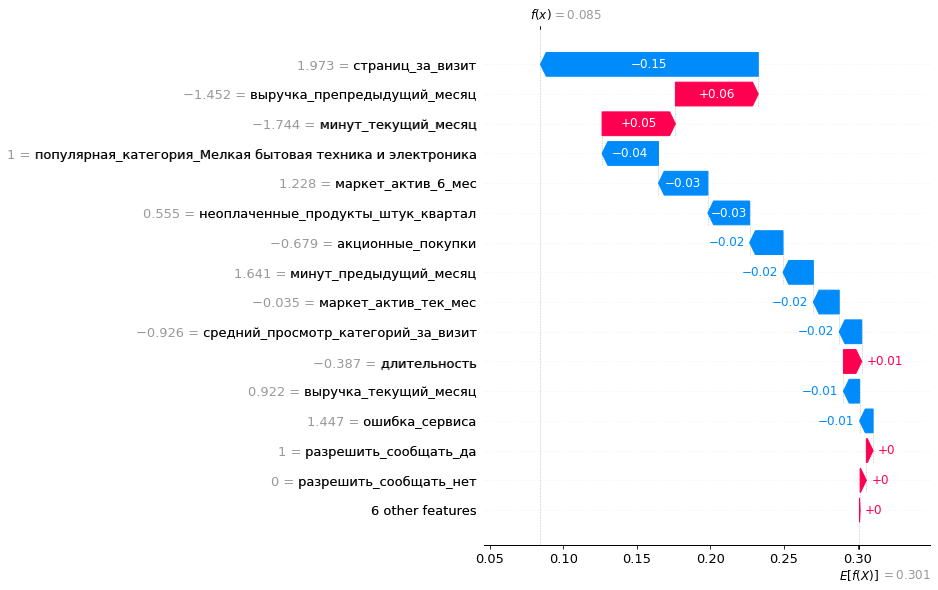

In [75]:
# SHAP-график waterfall

shap.plots.waterfall(shap_values[0, :, 1], max_display=16);

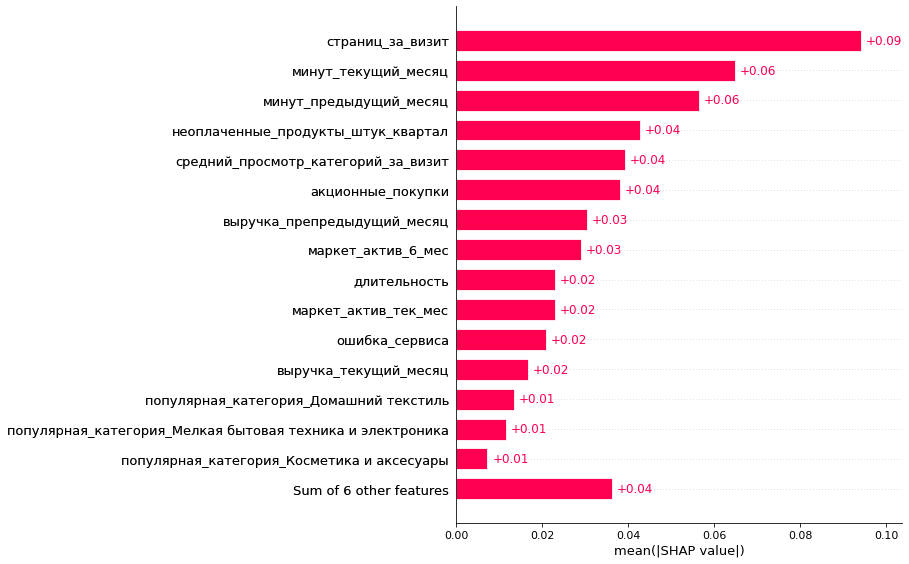

In [76]:
# SHAP-график bar

shap.plots.bar(shap_values[:, :, 1], max_display=16);

**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

**Наиболее значимые признаки для модели**:
- страниц_за_визит — самый влиятельный фактор: чем больше страниц просматривал пользователь, тем выше вероятность, что его активность не снизилась.
- минут_предыдущий_месяц и минут_текущий_месяц — продолжительность времени на сайте тесно связана с уровнем вовлечённости.
- средний_просмотр_категорий_за_визит — широта интересов пользователя (разнообразие категорий) также сигнализирует о более высокой активности.
- неоплаченные_продукты_штук_квартал — может отражать заинтересованность в продуктах, даже если покупка не завершена.
    
Эти признаки являются прямыми индикаторами вовлечённости клиента, что логично объясняет их влияние на модель.
    
**Слабо значимые признаки для модели**:
- выручка_текущий_месяц
- разрешить_сообщать
- тип_сервиса
- ошибка_сервиса
- длительность
    
Данные признаки практически не влияют на предсказание модели.
    
**Как использовать наблюдения при принятии бизнес-решений**:
    
- Оптимизация интерфейса и взаимодействия с сайтом:
    
Если большое количество просмотренных страниц и времени на сайте приводит к снижению покупательской активности, возможно, пользователь теряется в поиске нужного товара, а значит, стоит упростить поиск, улучшить фильтры и рекомендации, предлагать категории, которые потенциольно могут заинтересовать пользователя в начале визита.

- Сегментация пользователей для таргетинга:
    
Пользователи с признаками высокой вовлечённости (много страниц, времени, неоплаченные товары) могут быть целевой группой для триггерных e-mail или push-уведомлений.

- Фокус на признаки с высоким влиянием:
    
Признаки с низким SHAP-весом можно исключить из модели более лёгких моделей для повышения интерпретируемости, ускорения обучения, а также уменьшения переобучения.
    
- Бизнес-фокус на вовлечённость:
    
Стоит уделить больше внимания качеству взаимодействия с сайтом, а не общему количеству коммуникаций.

## Сегментация покупателей

Выполним сегментацию покупателей с высокой вероятностью снижения активности и высокой прибыльностью. Для этого будем использовать результаты моделирования и данные о прибыльности покупателей.

In [77]:
# готовим данные для сегментации
X_all = final_data.drop(columns=['id', 'покупательская_активность', 'покупательская_активность_num'])
X_all.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12,10
2,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13
3,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13
4,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11
5,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10


In [78]:
# делаем предсказания классов и вероятностей на всём наборе данных с помощью лучшей модели

y_all_pred = randomized_search.predict(X_all)
y_all_proba = randomized_search.predict_proba(X_all)[:, 1]

In [79]:
# восстанавливаем id
X_all_results = X_all.copy()
X_all_results['id'] = final_data['id'].values

In [80]:
# добавляем предсказания и вероятности в таблицу

X_all_results['предсказания'] = y_all_pred
X_all_results['вероятность_снижения'] = y_all_proba
X_all_results['предсказания_текст'] = X_all_results['предсказания'].map({0: 'Прежний уровень', 1: 'Снизилась'})

In [81]:
# выводим первые строки с результатами

X_all_results[['предсказания', 'вероятность_снижения', 'предсказания_текст']].head()

,предсказания,вероятность_снижения,предсказания_текст
1,1,0.935436,Снизилась
2,1,0.830508,Снизилась
3,1,0.576396,Снизилась
4,1,0.858116,Снизилась
5,1,0.959200,Снизилась


In [82]:
# напомним, какие данные содержатся в "money"

money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Объединим две таблицы по столбцу "id" и сохраним результат в одну общую таблицу "final_merged".

In [83]:
# объединяем таблицы и делаем проверку

final_merged = X_all_results.merge(money, on='id', how='left')
final_merged.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,id,предсказания,вероятность_снижения,предсказания_текст,прибыль
0,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12,10,215349,1,0.935436,Снизилась,4.16
1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13,215350,1,0.830508,Снизилась,3.13
2,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13,215351,1,0.576396,Снизилась,4.87
3,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11,215352,1,0.858116,Снизилась,4.21
4,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10,215353,1,0.959200,Снизилась,3.95


In [84]:
# проверяем распределение по предсказаниям

segment_counts = final_merged['предсказания_текст'].value_counts()
segment_counts

Прежний уровень    809
Снизилась          487
Name: предсказания_текст, dtype: int64

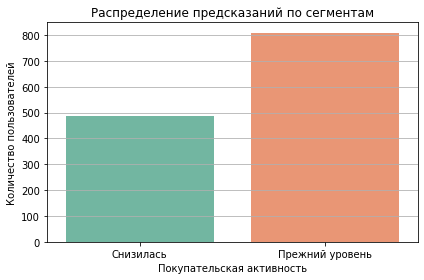

In [85]:
# строим график распределения

plt.figure(figsize=(6, 4))
sns.countplot(data=final_merged, x='предсказания_текст', palette='Set2')
plt.title('Распределение предсказаний по сегментам')
plt.xlabel('Покупательская активность')
plt.ylabel('Количество пользователей')
plt.grid(axis='y')
plt.tight_layout();

Сегмент "Снизилась" активности включает 487 клиентов.
Сегмент "Прежний уровень" — 809 клиентов.
Общее распределение рассмотрели. Теперь займёмся выбранным сегментом с высокой вероятностью снижения активности и высокой прибыльностью. Фильтрация будем проводить по двум условиям:
- высокая вероятность (> 0.7)
- высокая прибыль (входит в топ-25% по значению).

In [86]:
# отбираем только тех, кто соответствует этим 2 условиям

high_risk_threshold = 0.7
profit_75th = final_merged['прибыль'].quantile(0.75)

selected_segment = final_merged[
    (final_merged['вероятность_снижения'] > high_risk_threshold) &
    (final_merged['прибыль'] >= profit_75th)
]

In [87]:
# выбираем числовые признаки, исключая id и служебные столбцы

numeric_columns = selected_segment.select_dtypes(include=['float64', 'int64']).drop(
    columns=['id', 'предсказания']
)

In [88]:
# получаем описательную статистику нового сегмента

numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,103.0,3.621359,1.020827,0.900000,3.100000,3.800000,4.100000,5.700000
маркет_актив_тек_мес,103.0,4.106796,0.698915,3.000000,4.000000,4.000000,5.000000,5.000000
длительность,103.0,636.252427,246.255675,136.000000,450.000000,685.000000,820.000000,1073.000000
акционные_покупки,103.0,0.402913,0.266103,0.120000,0.240000,0.300000,0.395000,0.990000
средний_просмотр_категорий_за_визит,103.0,2.427184,1.125480,1.000000,2.000000,2.000000,3.000000,6.000000
неоплаченные_продукты_штук_квартал,103.0,3.747573,2.247955,0.000000,2.000000,4.000000,5.000000,10.000000
ошибка_сервиса,103.0,3.893204,1.904137,1.000000,3.000000,3.000000,5.000000,8.000000
страниц_за_визит,103.0,5.242718,3.405492,1.000000,3.000000,4.000000,6.000000,17.000000
выручка_препредыдущий_месяц,103.0,4644.203883,312.206046,4119.000000,4431.000000,4624.000000,4803.500000,5600.000000
выручка_текущий_месяц,103.0,5191.390291,850.984619,3078.300000,4465.100000,5299.600000,5829.100000,7063.000000


**Поведение на сайте**:
- **Страниц за визит**: медиана = 4, 75% пользователей из сегмента просматривают не более 6 страниц за визит.
- **Средний просмотр категорий за визит**: медиана = 2, 75% пользователей просматривают не более 3 категорий, что может говорить о поверхностном интересе клиентов к ассортименту.
- **Минут на сайте текущий месяц**: медиана = 10, максимум = 22. 75% пользователей проводят не более 12 минут на сайте.
- **Минут на сайте предыдущий месяц**: медиана = 10, максимум = 23. 75% пользователей проводят не более 12 минут на сайте.
- **Длительность клиента**: медиана = 685 дней — это очень давние клиенты, но вероятно теряющие интерес к сайту.

**Поведение при покупках**:
- **Выручка текущего месяца**: медиана около 5300.
- **Выручка в препредыдущий месяц**: медиана 4624. Интересное явление, несмотря на снижение активности, медианная выручка у клиентов остаётся стабильной и даже немного растёт. Это может говрить о том, что снижение активности выражается скорее во вовлечённости (меньше страниц, меньше времени), но не обязательно в денежных тратах.
- **Акционные покупки**: 75% пользователей совершают около 40% покупок по акциям, то есть наблюдается высокая чувствительность к скидкам.

**Проблемные зоны**:
- **Ошибки сервиса**: медиана = 3, максимум = 8. 75% пользователей сталкиваются с не менее, чем 5 сбоями.
- **Неоплаченные продукты за квартал**: медиана = 4, максимум = 10 — есть сложности при завершении покупки.

**Прибыль**:
- **Средняя прибыль**: 5.27
- **Медианная прибыль**: 5.12
- **Максимальная прибыль**: 7.43

Несмотря на снижение активности, сегмент остаётся прибыльным. Некоторые клиенты приносят высокую отдачу. Рассмотрим более детально некоторые из числовых признаков на ящиках с усами и сопоставим этот сегмент с клиентами, у которых сохранилась прежняя активность.

Возьмём для дальнейшего анализа следующие признаки:

| Признак                      | Обоснование                                                                 |
|-----------------------------|------------------------------------------------------------------------------|
| **длительность**            | Показывает, как давно клиент с нами. Можно оценить связь между лояльностью и активностью. |
| **акционные_покупки**       | Отражает чувствительность к скидкам — важный критерий при построении предложений. |
| **страниц_за_визит**        | Индикатор вовлечённости: чем больше страниц, тем выше интерес к сайту. |
| **выручка_текущий_месяц**   | Прямой показатель денежной активности на текущий момент. |
| **прибыль**                 | Ключевой бизнес-показатель: даже при снижении активности клиент может быть прибыльным. |
| **минут_текущий_месяц**     | Временной показатель интереса к сайту. |
| **минут_предыдущий_месяц**  | Нужен для анализа изменения интереса с течением времени. |

In [89]:
# формируем новый сегмент покупателей
selected_segment = final_merged[
    (final_merged['вероятность_снижения'] > 0.7) &
    (final_merged['прибыль'] >= profit_75th)
].copy()
selected_segment['сегмент'] = 'Новый сегмент'

In [90]:
# указываем покупателей с прежним уровнем активности
active_all = final_merged[
    final_merged['предсказания_текст'] == 'Прежний уровень'
].copy()
active_all['сегмент'] = 'Прежний уровень'

In [91]:
# объединяем их для сравнения
comparison_df = pd.concat([active_all, selected_segment], ignore_index=True)

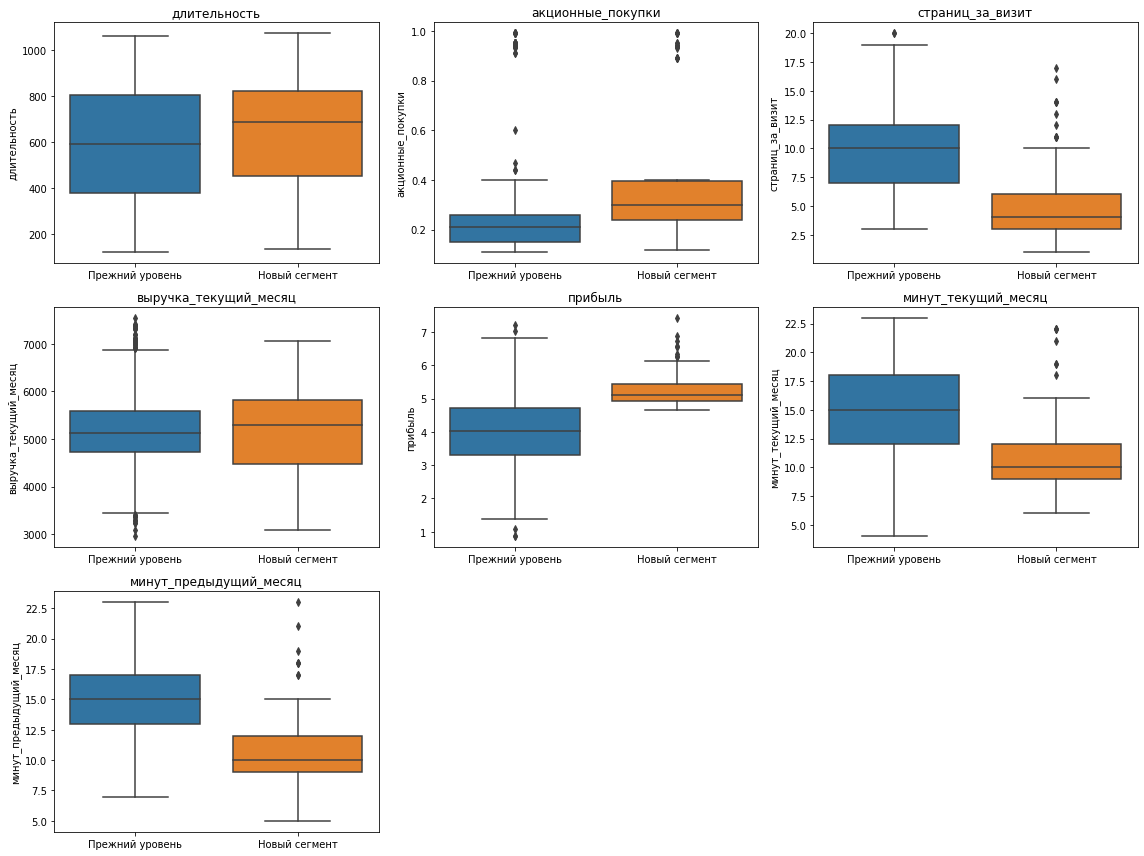

In [92]:
# строим ящики с усами для сравнения этих сегментов
columns_to_plot = [
    'длительность',
    'акционные_покупки',
    'страниц_за_визит',
    'выручка_текущий_месяц',
    'прибыль',
    'минут_текущий_месяц',
    'минут_предыдущий_месяц'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(columns_to_plot):
    if col in comparison_df.columns:
        sns.boxplot(data=comparison_df, x='сегмент', y=col, ax=axes[idx])
        axes[idx].set_title(col)
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel(col)

# удаляем лишние оси
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout();

**длительность**:
- Медианы различаются незначительно, у рассматриваемого сегмента она немного выше.
- Разброс значений также схож.
Снижение активности чаще наблюдается у тех, кто пользуется сервисом дольше.

**акционные_покупки**:
- В сегменте "Новый сегмент" медиана заметно выше медиана.
Клиенты с пониженной активностью ориентированы на скидки и акции.

**страниц_за_визит**:
- У сегмента "Новый сегмент" медиана гораздо ниже, чем у пользователей с прежней вовлечённостью.
Снижение активности напрямую связано с падением вовлечённости: пользователи реже и поверхностнее изучают сайт.
Это может быть связано с потерей интереса, неудобной навигацией, или тем, что пользователь сразу переходит к нужному товару и уходит.

**выручка_текущий_месяц**:
- Медиана у рассматриваемого нами сегмента чуть выше, чем у «Прежнего уровня».
- Разброс больше: в новом сегменте есть как клиенты с низкой выручкой, так и с очень высокой.
Несмотря на снижение активности, часть клиентов продолжает делать крупные покупки, а медианная выручка даже чуть выше.

**прибыль**:
- Медиана у нового сегмента выше, чем у пользователей с прежним уровнем активности.
- У нового сегмента прибыль более сконцентрирована в верхнем диапазоне без сильных провалов. Эти клиенты действительно очень ценные. Даже при риске снижения активности они дают максимальную прибыль бизнесу.
Даже при риске снижения активности сегмент остаётся высокоприбыльным. Это делает его приоритетным для удержания.

**минут_текущий_месяц** и **минут_предыдущий_месяц**:
- В рассматриваемом нами сегменте, клиенты проводят меньше времени на сайте, и этот тренд сохраняется два месяца подряд.
Это говорит о падении интереса, вовлечённости и, возможно, удобства интерфейса или релевантности контента.

Таким образом, сегмент покупателей с пониженной активностью не теряет в выручке, наоборот, медиана немного выше. По прибыли также остаётся важным: есть клиенты с высокой отдачей. Значит, снижение активности — это не про деньги, а про вовлечённость, интерес и поведение и именно на эти аспекты стоит воздействовать для возвращение интереса у пользователей.

**Вывод**

<div style="border:solid lightblue 3px; padding: 20px">

Подведём итоги данной главы.

В качестве исследуемого сегмента был выбран сегмент клиентов с высокой вероятностью снижения активности и высокой прибыльностью.
    
Анализ показал, что:
- У них ниже вовлечённость: меньше просмотренных страниц, меньше времени на сайте.
- Однако выручка и прибыль остаются на приемлемом уровне, а в ряде случаев, даже выше, чем у активных клиентов.
- Клиенты этого сегмента хорошо реагируют на акции и скидки.

Предложения по работе с данным сегментом:
- Запустить персонализированные маркетинговые кампании, ориентированные на скидки и специальные предложения.
- Использовать уведомления (например, по почте), чтобы напомнить о незавершённых покупках и новых акциях.
- Повысить удобство интерфейса: упростить путь к покупке, сократить число кликов, улучшить навигацию по категориям.
- Восстановить вовлечённость с помощью бонусных баллов за просмотры, участие в опросах, активности.
- Индивидуальная работа с высокоприбыльными клиентами внутри этого сегмента, например, удержание через привилегии, персональные условия и ранний доступ к акциям.

## Общий вывод

### Описание задачи

Компания «В один клик» заметила снижение покупательской активности. Привлечение новых клиентов стало неэффективным, поэтому акцент сделан на удержании постоянных.  

Задача исследования — найти наиболее оптимальную модель, которая будет предсказывать вероятность снижения активности клиентов, чтобы применять персонализированные предложения и повысить лояльность.

### Описание исходных данных и проведённой предобработки

Для анализа использовались 4 csv-файла:

1. **market_file.csv** — поведенческие и маркетинговые данные по каждому покупателю: сервис, акции, категории, ошибки, просмотры и пр.
2. **market_money.csv** — выручка за 3 периода: текущий, предыдущий и предпредыдущий месяц.
3. **market_time.csv** — время (в минутах), проведённое на сайте в те же периоды.
4. **money.csv** — средняя прибыль с покупателя за последние 3 месяца.

Предобработка включала следующие преобразования:
- Привели названия столбцов ко змеиному регистру во всех таблицах.
- Обработали неявные дубликаты в таблицах "market_file" и "market_time".

### Поиск лучшей модели

Что было сделано:
- Была собрана модель классификации для предсказания вероятности снижения покупательской активности клиентов.
- Использовались поведенческие, маркетинговые и финансовые признаки.
- Признаки обрабатывались через `ColumnTransformer`:  
  - Категориальные — через `OrdinalEncoder` и `OneHotEncoder`
  - Числовые — через `StandardScaler` и `MinMaxScaler`.
- Для подбора модели и параметров применён `RandomizedSearchCV` с перекрёстной проверкой и метрикой `ROC-AUC`.
- Были протестированы 4 модели:
  - `DecisionTreeClassifier`
  - `KNeighborsClassifier`
  - `LogisticRegression` (с L1-регуляризацией)
  - `SVC` (с различными ядрами и параметрами C)

В результате лучшей моделью оказалась:
- `SVC` с параметрами `C=10`, `probability=True`, `kernel='rbf'`
- Признаки обрабатывались с помощью:
- `ROC-AUC` на кросс-валидации: `0.901`, на тестовой: `0.908`, что говорит о стабильной и качественной рабое модели без недообучения/переобучения. Это означает, что модель хорошо различает клиентов с вероятностью снижения активности и без неё.

### Выводы и дополнительные предложения для выбранного сегмента покупателей

В результате анализа был выделен сегмент клиентов с высокой вероятностью снижения активности (> 0.7) и высокой прибыльностью (входит в топ-25%).

**Ключевые выводы**:
- Клиенты проводят меньше времени на сайте и просматривают меньше страниц, что говорит о снижении вовлечённости.
- Несмотря на это, медианная выручка и прибыль выше, чем у активных клиентов, а значит сегмент остаётся финансово ценным.
- Они чаще совершают акционные покупки и демонстрируют чувствительность к скидкам.
- Большинство из них — давние клиенты, что может говорить о снижении интереса к сайту или ассортименту товаров.

**Рекомендации по удержанию**:

1. Индивидуальные скидки и предложения, основанные на прошлой активности:

   Использовать данные о покупках, интересах и любимых категориях клиента для формирования персонализированных акций — например, скидки на товары, которые он регулярно просматривает или покупал ранее.


2. Напоминания о брошенных корзинах, персонализированные push и email-уведомления:

   Отправлять автоматические, но индивидуализированные сообщения с напоминанием о забытых товарах, снижении цены или наличии скидки на интересующий продукт, но без излишней навязчивости, которая может отпугнуть некоторых клиентов ещё больше.


3. Упрощение пользовательского опыта: навигация, фильтры, быстрый доступ к любимым товарам:

   Сделать интерфейс удобным для опытных пользователей: предусмотреть быстрый переход к повторной покупке, избранным товарам, категориям с акциями и ограничить количество шагов до оформления заказа.


4. Механики вовлечения: бонусы за просмотр, ранний доступ, участие в программах лояльности:

   Стимулировать возвращение интереса через игровые элементы: начисление бонусов за действия на сайте, доступ к новым коллекциям до официального запуска, баллы за активность и участие в сообществе магазина.


5. Работа с VIP-клиентами: приоритетный сервис, закрытые акции, привилегии для удержания самых прибыльных:

   Обеспечить обслуживание высокого качества: персональные предложения, ускоренная доставка, доступ к закрытым распродажам, возможность напрямую обратиться к менеджеру или консультанту.
   
Этот сегмент не массовый, но высокодоходный. Они не требуют массовой рекламы или дорогостоящих акций, но им нужен персонализированный и удобный опыт, чтобы мотивировать их остаться. Потеря даже части этих клиентов будет ощутима для бизнеса: они приносят значительную часть прибыли, несмотря на снижение активности.